# Visualização

<img src="images/python-logo.jpg" alt="Python" style="width: 300px;"/>

Um dos skills complementares muito importantes para um Data Scientist é a capacidade de ilustrar os resultados das suas análises através de visualizações. Uma boa utilização de ferramentas de visualização permite:

* mostrar as conclusões através de uma linguagem menos técnica, permitindo chegar a uma audiência mais alargada;
* chamar a atenção, de forma visual, aos pontos mais importantes da análise;
* visualizar certos dados que não são fáceis de analisar em formato tabular (por exemplo, dados geográficos);
* permitir que o utilizador interaja com os dados e obtenha respostas para as suas próprias questões.

Vejamos um exemplo de uma das primeiras ocasiões em que boas técnicas de visualização de dados levaram a resultados importantes.

Em Agosto de 1854, houve uma grande epidemia de cólera em Londres, que levou à morte de 10% dos residentes de Soho numa só semana. A teoria predominante na altura era que a doença se espalhava pelo ar (o que era reforçado pelo estado olfactório de Londres na altura); no entanto, o Dr. John Snow tinha uma teoria diferente - ele acreditava que a doença se espalhava através da água, o que agora sabemos estar correcto.

Para reforçar a sua teoria, o doutor marcou num mapa, ao longo de alguns dias, o local de residência de novos infectados. Obteve o seguinte resultado:

<img src="images/colera.jpg" alt="Python" style="width: 600px;"/>    
    
Podemos ver que os casos estão altamente concentrados numa certa área - em redor de uma das maiores fontes de água potável de Londres nessa altura. Esta visualização ajudou a convencer as pessoas a ferverem a sua água antes de a consumirem, e desta forma, a epidemia de cólera foi ultrapassada.

Como pudemos ver, é extremamente útil saber construir boas visualizações para suportar as nossas conclusões como Data Scientists. Existem várias libraries de visualização de dados para Python, e nós vamos aprender uma das mais utilizadas - o **Matplotlib**

# Matplotlib

O Matplotlib é uma library para "criar visualizações estáticas, animadas e interactivas em Python", e tem boa sinergia com o Pandas, sendo os dois frequentemente usados em conjunto.

Neste notebook vamos aprender como fazer algumas das visualizações mais comuns, e para que tipos de dados cada uma deles funciona melhor.

### Instalação / import

Podemos instalar o Matplotlib com qualquer dos gestores de packages mais comuns (por exemplo, com o Anaconda: https://anaconda.org/conda-forge/matplotlib). Após a instalação podemos importá-lo com: 

In [1]:
import matplotlib.pyplot as plt

Vamos também importar o Pandas

In [2]:
import pandas as pd

### Magic command: matplotlib inline

Podemos usar um "magic command" do Jupyter Notebook para fazer com que as visualizações do Matplotlib apareçam directamente no notebook ("inline"), sem necessidade de as exportar para um ficheiro:

In [3]:
%matplotlib inline

# Scatter plot

Seguindo o exemplo do Dr. Snow, vamos começar por aprender o como fazer um "scatter plot" (plot: gráfico).
Este tipo de visualização é ideal para visualizar a variação de uma variável **numérica** em relação a outra. Cada instância de (variável 1, variável 2) é representada como um ponto na visualização.

Podemos criar um scatter plot com a função **scatter**. Vamos importar os dados das *hotel reviews*, e fazer um scatter plot da latitude vs longitude:

In [4]:
df_reviews = pd.read_csv('data/hotel-reviews/hotel_reviews.csv')

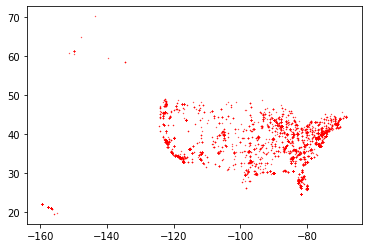

In [5]:
plt.scatter(
    x=df_reviews.longitude,
    y=df_reviews.latitude,
    c='red',
    s=0.1
)

plt.show()

Usamos três parâmetros, dos quais apenas `x` e `y` são necessários.

* `x`/`y` permitem-nos escolher a variável que está no respectivo eixo;
* `c` permite-nos definir a cor dos pontos;
* `s` permite definir o tamanho de cada ponto.

Com **plt.show()** fazemos a visualização aparecer (pode ser omitido, mas aparece algum texto extra).

Vamos aumentar um pouco o tamanho das figuras no Notebook, da seguinte forma:

In [6]:
plt.rcParams["figure.figsize"] = [12, 8]  # 12: largura, 8: altura

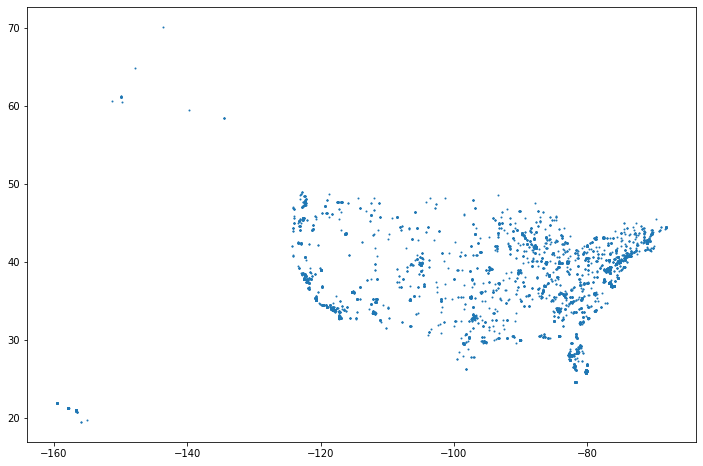

In [8]:
plt.scatter(
    x=df_reviews.longitude,
    y=df_reviews.latitude,
    s=1
)

Podemos também colorir os pontos de acordo com uma terceira coluna. Vamos fazer o mesmo plot, mas com os pontos coloridos de acordo com a pontuação da review, com um título e com labels nos eixos:

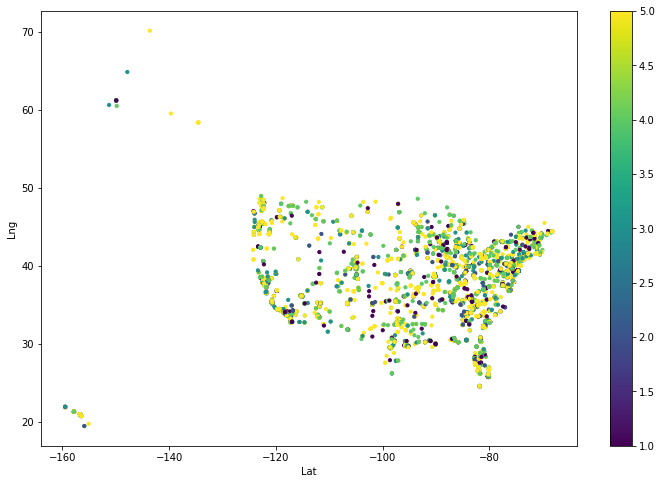

In [9]:
plt.scatter(
    x=df_reviews.longitude,
    y=df_reviews.latitude,
    c=df_reviews['reviews.rating'],
    s=10,
    cmap='viridis'
)

plt.xlabel('Lat')
plt.ylabel('Lng')

plt.colorbar()

plt.show()

Desta vez, usamos como argumento `c` uma coluna com um valor numérico, e escolhemos o mapa de cor 'viridis' com o argumento `cmap`. Podemos ver uma lista dos colormaps disponíveis aqui: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

Para fazer aparecer a barra de cores, usamos a função **plt.colorbar**. As funções **xlabel** e **ylabel** foram usadas para adicionar labels aos eixos, e a função **title** foi usada adicionar um título.

De notar que o Pandas tem visualizações integradas, que podemos usar se quisermos visualizar algo mais rapidamente e com pouca personalização:

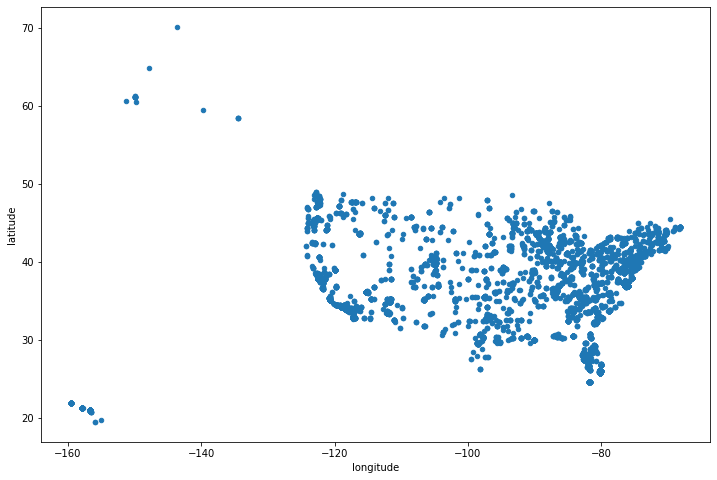

In [11]:
df_reviews.plot.scatter(x='longitude', y='latitude')

plt.show()

# Gráfico de barras

Usamos um gráfico de barras ("bar charts") para comparar quantidades discretas, como por exemplo a frequência de ocorrência das várias classes de uma variável categórica. Em geral, usamos barras horizontais quando as classes têm uma ordenação entre si, e barras verticais caso contrário.

Vamos comparar a frequência de ocorrência de reviews em cada cidade (contando apenas com as 20 cidades mais activas). Começando por calcular este valor:

In [12]:
frequencia = df_reviews.city.value_counts()[0:20]

frequencia

Las Vegas            506
Chicago              356
Virginia Beach       257
Boston               249
Arlington            217
Springfield          208
Hyattsville          202
Miami Beach          197
Baltimore            184
New Orleans          183
Atlanta              154
Charleston           149
Hanover              130
San Francisco        120
Lahaina              116
Seattle              111
Napa                 110
Linthicum Heights    101
Kissimmee            101
Phoenix               99
Name: city, dtype: int64

Vamos agora fazer o plot:

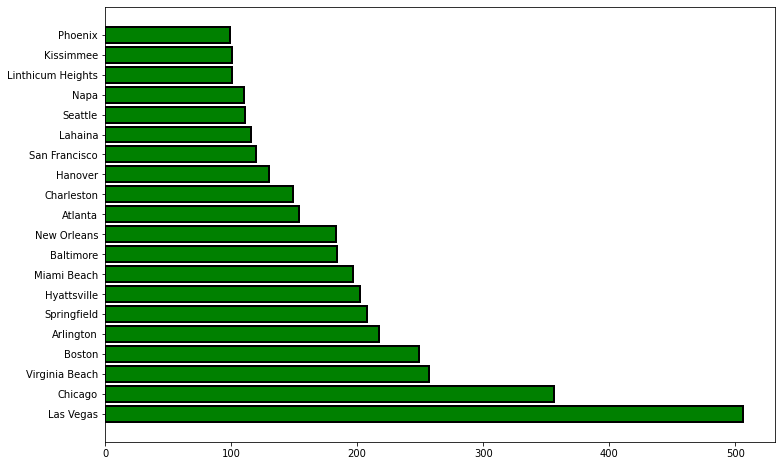

In [13]:
categorias = frequencia.index
valores = frequencia.values

plt.barh(
    categorias,
    valores,
    color='green',
    edgecolor='black',
    linewidth=2
)

plt.show()

Como podemos ver, usamos a função **barh** (h = horizontal) para criar esta visualização, visto que não há uma ordenação intrinseca nas cidades. 

**Para clarificar**: aqui, por acaso, os valores estão ordenados em ordem decrescente, mas não há nada que diga que *Las Vegas* é intrinsecamente "maior" que *Boston*, no sentido de existir uma ordenação entre estas duas categorias. Se por exemplo as nossas categorias fossem escalões de idades (<20, 20-50, >50) faria sentido ordená-las da esquerda para a direita, independentemente da frequência de cada escalão.

O primeiro e segundo argumento desta função controlam as categorias usadas, e o valor associado a cada categoria. Podemos ver também que a cor das barras é controlada com o argumento `color`. Aprendemos também mais dois argumentos possíveis:

* `edgecolor`: controla a cor da borda das barras;
* `linewidth`: controla a espessura das borda das barras.

Para fazer um gráfico de barras vertical, podemos usar a função **bar**.

# Histogramas

Podemos usar um histograma para ter uma noção da distribuição de uma variável numérica. Isto é feito criando intervalos ("bins") de valores e para cada ocorrência da variável, colocá-la num destes bins. Por fim, é contado o número de ocorrências em cada bin. Podemos pensar num histograma como um gráfico de barras para variáveis contínuas.

Vamos criar um histograma do tamanho do texto das classificações. Vamos começar por calcular este valor:

In [14]:
tamanho = df_reviews['reviews.text'].dropna().str.len()

E agora vamos criar o histograma: 

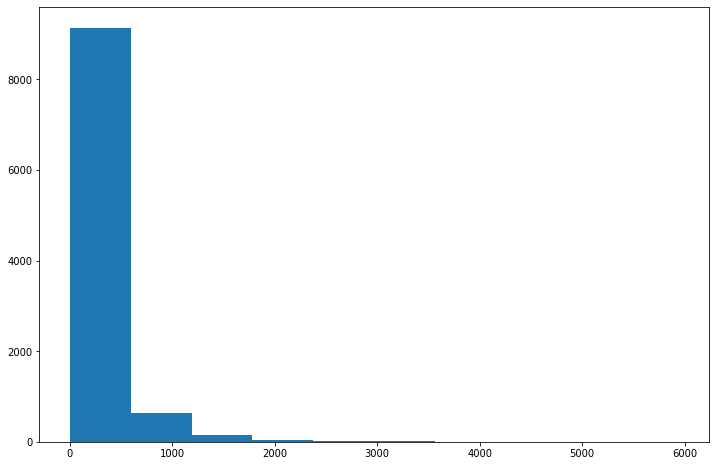

In [15]:
plt.hist(
    tamanho
)

plt.show()

Reparamos que a maior parte das reviews tem menos de 1000 caractéres.

Para controlar o valor mínimo/máximo do eixo dos `x`, podemos usar o parâmetro `range`.
O número de bins é 10 por defeito. Para controlar o tamanho de cada bin, podemos usar o argumento `bins`:

* se passarmos um valor inteiro (N) a este argumento, irão ser criados N bins de largura idêntica com base no valor máximo e mínimo dos dados;
* se passarmos uma lista, podemos definir o início e o fim de cada bin, por ordem.

Vamos agora fazer um histograma para as reviews com menos de 2000 caractéres, para olharmos melhor para os dados.

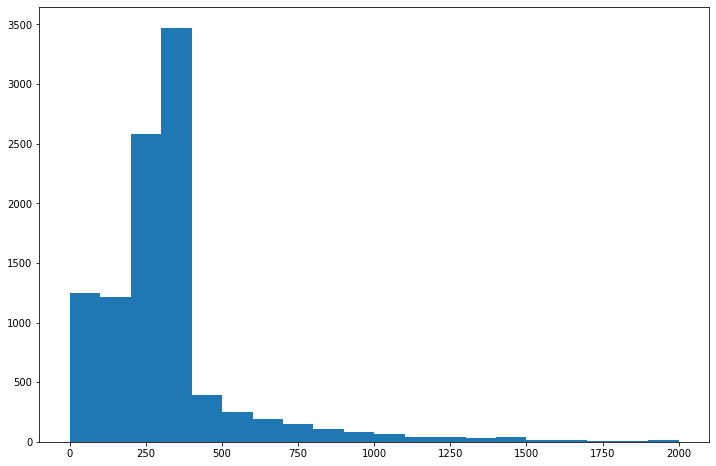

In [16]:
plt.hist(
    tamanho,
    range=(0,2000),
    bins=20
)

plt.show()

Por vezes, os dados podem ter valores extremamente elevados ou baixos, que podem complicar as visualizações e análises. Estes pontos são conhecidos como "outliers" e são um conceito bastante importante de compreender para um Data Scientist. Neste caso, reduzir os nosso dados para um intervalor mais razoável permitiu-nos chegar a conclusões mais interessantes.

Por fim, é importante mencionar que o aspecto de um histograma varia drasticamente com o número de bins, por isso é importante escolher valores sensatos para os mesmos. Vejamos um exemplo com 3 bins:

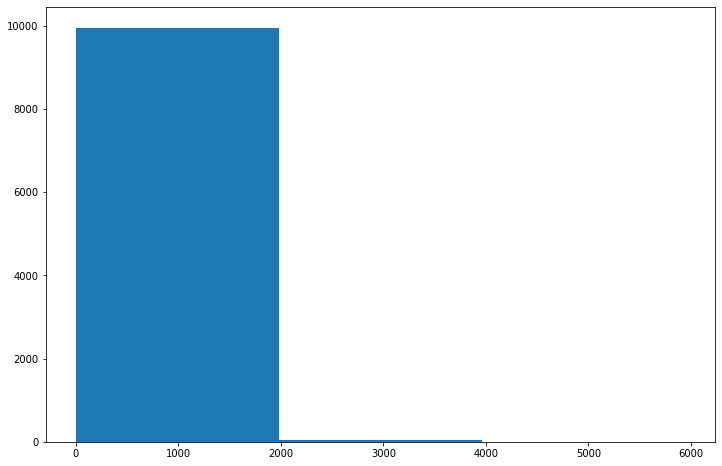

In [17]:
plt.hist(
    tamanho,
    bins=3
)

plt.show()

Como podemos ver, não é muito útil.

# Pie Chart

Um "pie chart" (talvez a visualização mais conhecida!) permite-nos comparar a percentagem de ocorrências dos diferentes valores de uma variável categórica. Para ilustrar, vamos usar as 5 cidades mais frequentes nos dados:

In [18]:
frequencia = df_reviews.city.value_counts()[0:5]

frequencia

Las Vegas         506
Chicago           356
Virginia Beach    257
Boston            249
Arlington         217
Name: city, dtype: int64

Podemos criar o pie chart com a função **pie**:

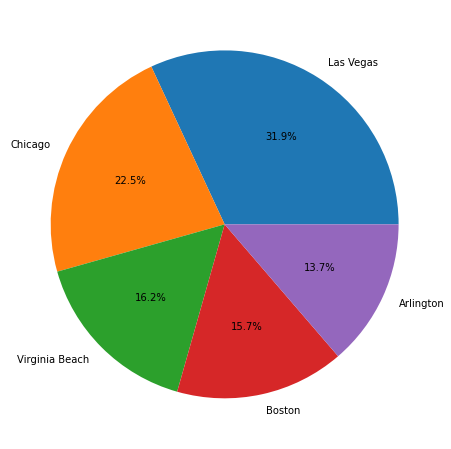

In [19]:
categorias = frequencia.index
valores = frequencia.values

plt.pie(
    valores,
    labels=categorias,
    autopct='%.1f%%'
)

plt.show()

O primeiro argumento é a contagem de valores para cada classe, e as classes são especificadas pelo argumento `labels`. O argumento `autopct`=`%1.1f%%` permite escrever automaticamente a percentagem sobre cada fatia:

* o primeiro sinal de percentagem indica que estamos a escrever um "format string", que define o que vai aparecer escrito;
* de seguida temos a indicação que queremos uma única casa decimal; 
* por fim temos dois sinais de percentagem de seguida, em que o primeiro dá "escape" ao segundo. Isto indica que queremos que o caractér "%" apareça escrito, e não apenas o valor da percentagem.,

## Boxplot

Por fim, vamos aprender um tipo de visualizçaão mais avançada - o *boxplot*. Este é um tipo de visualização que permite transmitir muita informação útil sobre a distribuição de uma variável; por outro lado, é uma visualização mais complicada de interpretar.

Vamos exemplificar, vendo a distribuição do tamanho dos *usernames* em duas cidades diferentes. 

In [21]:
df_duas_cidades = df_reviews.loc[
    df_reviews.city.isin(['Las Vegas', 'Boston']),
    ['city', 'reviews.username']
]


df_duas_cidades['comprimento_username'] = df_duas_cidades['reviews.username'].str.len()

In [22]:
df_duas_cidades[['comprimento_username', 'reviews.username']]

,comprimento_username,reviews.username
99,4,Lori
100,7,Rohanna
101,5,Maria
102,4,Rami
103,7,Matthew
...,...,...
9883,4,Rich
9884,10,A Traveler
9885,5,David
9886,10,A Traveler


Para criar o boxplot, vamos usar a integração com o Pandas, visto ser bastante mais simples neste caso! Podemos fazê-lo através do método **boxplot**:

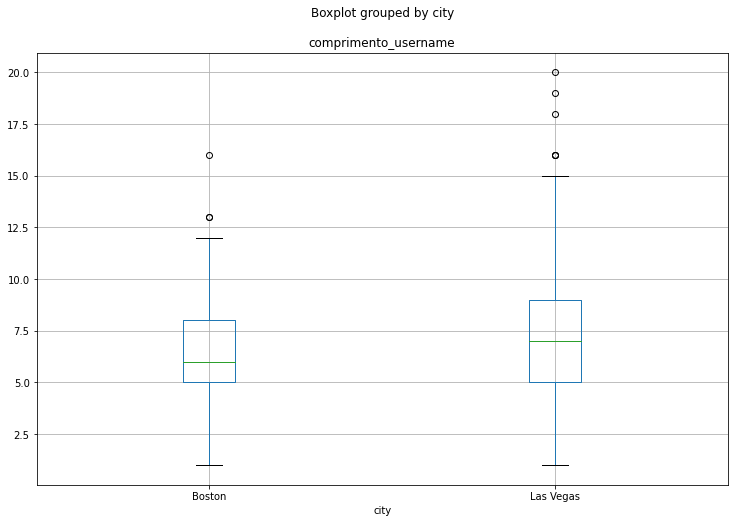

In [23]:
df_duas_cidades.boxplot(column='comprimento_username', by='city')

plt.show()

Usamos o argumento `column` para definir a coluna cujos valores queremos analisar, e o argumento `by` para separar esta análise por cada classe distinta (neste caso, as duas cidades escolhidas).

Vamos interpretar o boxplot:

* cada box tem 5 traços horizontais. O primeiro traço (a contar de baixo) é o valor mínimo;
* o traço seguinte é o quartil-1 (25% de todos os usernames, para essa cidade, terão um comprimento menor que este valor). Podemos ver que o percentil-25 é 5 caractéres, tanto para Bosto como para Chicago;
* os traço seguinte são a mediana (50% dos valores encontram-se abaixo deste valor), e o quartil-3;
* o rectângulo situado entre o quartil-1 e o quartil-3 chama-se a distância interquartil (IQ);
* o último traço é o valor máximo encontrado, **excluindo outliers**

Nesta visualização, os outliers são definidos como todos os pontos que se encontram a mais de 1.5\*IQ de distância abaixo do quartil-1 ou acima do quartil-3. Como podemos ver, temos alguns usernames com mais de 15 caractéres, considerados outliers.

Podemos concluir que em geral, os utilizadores de Las Vegas tem usernames mais longos.

## Estilos

Para melhorar o aspecto das nossas visualizações, podemos utilizar estilos diferentes fornecidos pelo Matplotlib. 
Podemos ver o tipo de estilos disponíveis da seguinte forma:

In [24]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Podemos escolher o estilo com a função **plt.style.use()**. Vamos experimentar alguns estilos diferentes em gráficos de barras:

In [25]:
frequencia = df_reviews.city.value_counts()[0:20]
categorias = frequencia.index
valores = frequencia.values

plt.rcParams["figure.figsize"] = [8, 6]

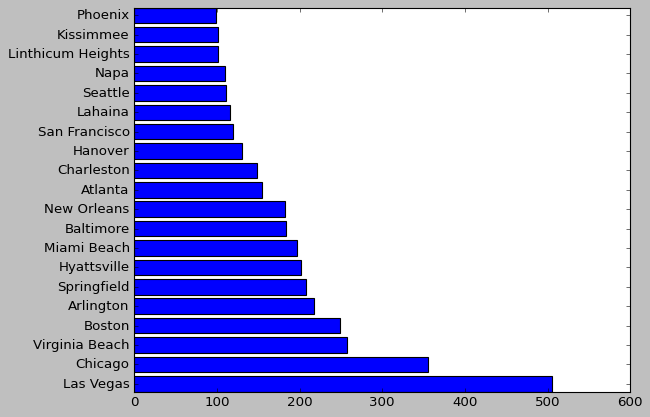

In [26]:
plt.style.use('classic')

plt.barh(
    categorias,
    valores
)

plt.show()

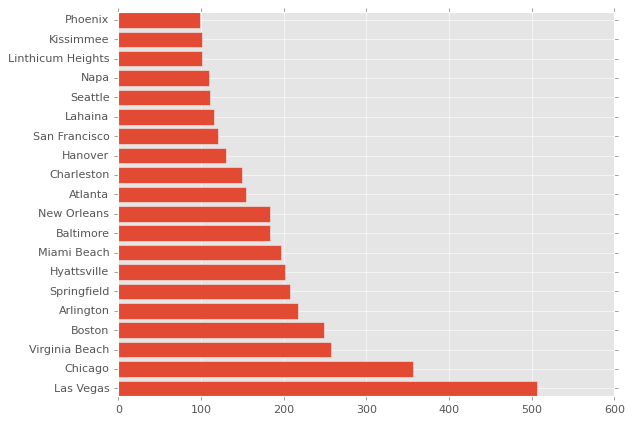

In [27]:
plt.style.use('ggplot')

plt.barh(
    categorias,
    valores
)

plt.show()

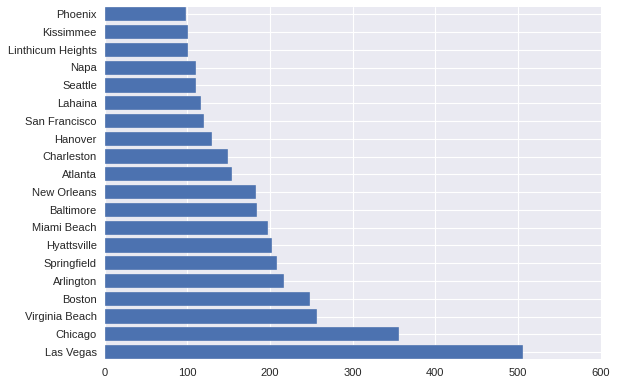

In [28]:
plt.style.use('seaborn')

plt.barh(
    categorias,
    valores
)

plt.show()

# Conclusão

Neste notebook, aprendemos a importância de seleccionar as visualizações certas para ilustrar as nossas análises. Aprendemos também os básicos do Matplotlib, uma library que nos permite criar vários tipos de visualizações e tem boa integração com o Pandas.

Algumas considerações finais:

* a criar visualizações, lembrem-se que o objectivo não é criar as visualizações mais complexas possivel, e o conteũdo é mais importante que o estilo (menos é mais!). Por isso, evitem gráficos de barra em 3-dimensões, pie charts com gradientes, etc.
* este Notebook apenas tocou nos básicos do Matplotlib, mas esta library permite uma grande capacidade de manipulação dos detalhes de baixo nível de cada gráfico.
* se tiverem interesse em expandir o vosso conhecimento de libraries de visualização de dados, um bom próximo passo seria o **seaborn**: uma library que utiliza o Matplotlib e expande as suas funcionalidades, com funções bastante intuitivas.